<a href="https://colab.research.google.com/github/zShadil/GIT-Assignment/blob/main/Supervised_Casestudy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study: Customer Churn Prediction

## Introduction

Customer churn is an important problem in the telecommunications industry because retaining existing customers is more cost-effective than acquiring new ones. This project aims to build a machine learning model that predicts whether a customer is likely to churn based on historical customer data. By identifying customers at risk of leaving, the company can take timely actions to improve customer retention.

#Data Pre-Processing


importing libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression#logistic regression
from sklearn.neighbors import KNeighborsClassifier#knn
from sklearn.naive_bayes import GaussianNB #naive bayes
from sklearn.tree import DecisionTreeClassifier #decision Tree
from sklearn.svm import SVC #svm
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

importing dataset

In [89]:
churn_data=pd.read_csv("/content/Training_data.csv")

##Exploratory Data Analysis

In [90]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [91]:
churn_data.size

118314

In [92]:
churn_data.shape

(5634, 21)

In [93]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [94]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [95]:
churn_data.nunique() #checking unique values

,0
customerID,5634
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [96]:
churn_data['TotalCharges'].dtype  #total charges is in object datatype
churn_data['TotalCharges']=pd.to_numeric(churn_data['TotalCharges'],errors='coerce')
churn_data['TotalCharges'].isna().sum()

np.int64(290)

In [97]:
churn_data['MultipleLines'].value_counts()
#"no phone service" come under the column no , so we can merge the column to avoid redundant information

,count
MultipleLines,
No,2701
Yes,2380
No phone service,553


In [98]:
churn_data['MultipleLines']=churn_data['MultipleLines'].replace('No phone service','No')

In [99]:
churn_data['InternetService'].value_counts()#InternetService contains distinct values
churn_data['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,2720
Yes,1574
No internet service,1171


In [100]:
churn_data['DeviceProtection'].value_counts()

,count
DeviceProtection,
No,2485
Yes,1946
No internet service,1203


In [101]:
churn_data['OnlineBackup'].value_counts()

,count
OnlineBackup,
No,2459
Yes,1972
No internet service,1203


In [102]:
churn_data['TechSupport'].value_counts()

,count
TechSupport,
No,2782
Yes,1649
No internet service,1203


In [103]:
churn_data['StreamingTV'].value_counts()

,count
StreamingTV,
No,2244
Yes,2187
No internet service,1203


In [104]:
churn_data['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2232
Yes,2199
No internet service,1203


In [105]:
churn_data['Contract'].value_counts()#distinct values
churn_data['PaymentMethod'].value_counts() #distinct


,count
PaymentMethod,
Electronic check,1892
Mailed check,1278
Bank transfer (automatic),1248
Credit card (automatic),1216


In [106]:
internet_dependent_cols = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]
for col in internet_dependent_cols:
    churn_data[col] = churn_data[col].replace('No internet service', 'No')
churn_data['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,3435
Yes,2199


In [107]:
churn_data=churn_data.drop('customerID',axis=1)  #dropping irrelevent customerID column

checking for null values

In [108]:
churn_data.isnull().sum()

,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169
OnlineBackup,0


Checking for duplicate values

In [109]:
churn_data.duplicated().sum()

np.int64(8)

In [110]:
churn_data=churn_data.drop_duplicates()

Handling Null values


In [111]:
#fillling gender null values with 'Unknown' variable
churn_data['gender']=churn_data['gender'].fillna('Unknown')
#droping 169 rows for irrelevent feature gender would affect important customer's details

/tmp/ipython-input-990219962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=churn_data, palette='viridis')


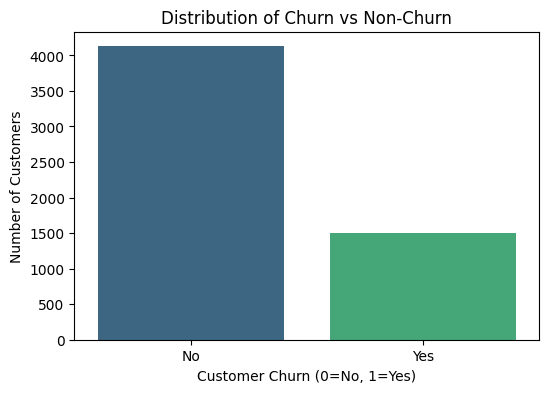

In [112]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=churn_data, palette='viridis')
plt.title('Distribution of Churn vs Non-Churn')
plt.xlabel('Customer Churn (0=No, 1=Yes)')
plt.ylabel('Number of Customers')
plt.show()
#dataset is imbalanced,the model is seeing many more "Non-Churn"  than "Churn".

In [113]:
categorical=churn_data.select_dtypes(['object','category']).columns
numerical=churn_data.select_dtypes(['int64','float64']).columns

In [114]:
print(numerical)
print(categorical)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>]], dtype=object)

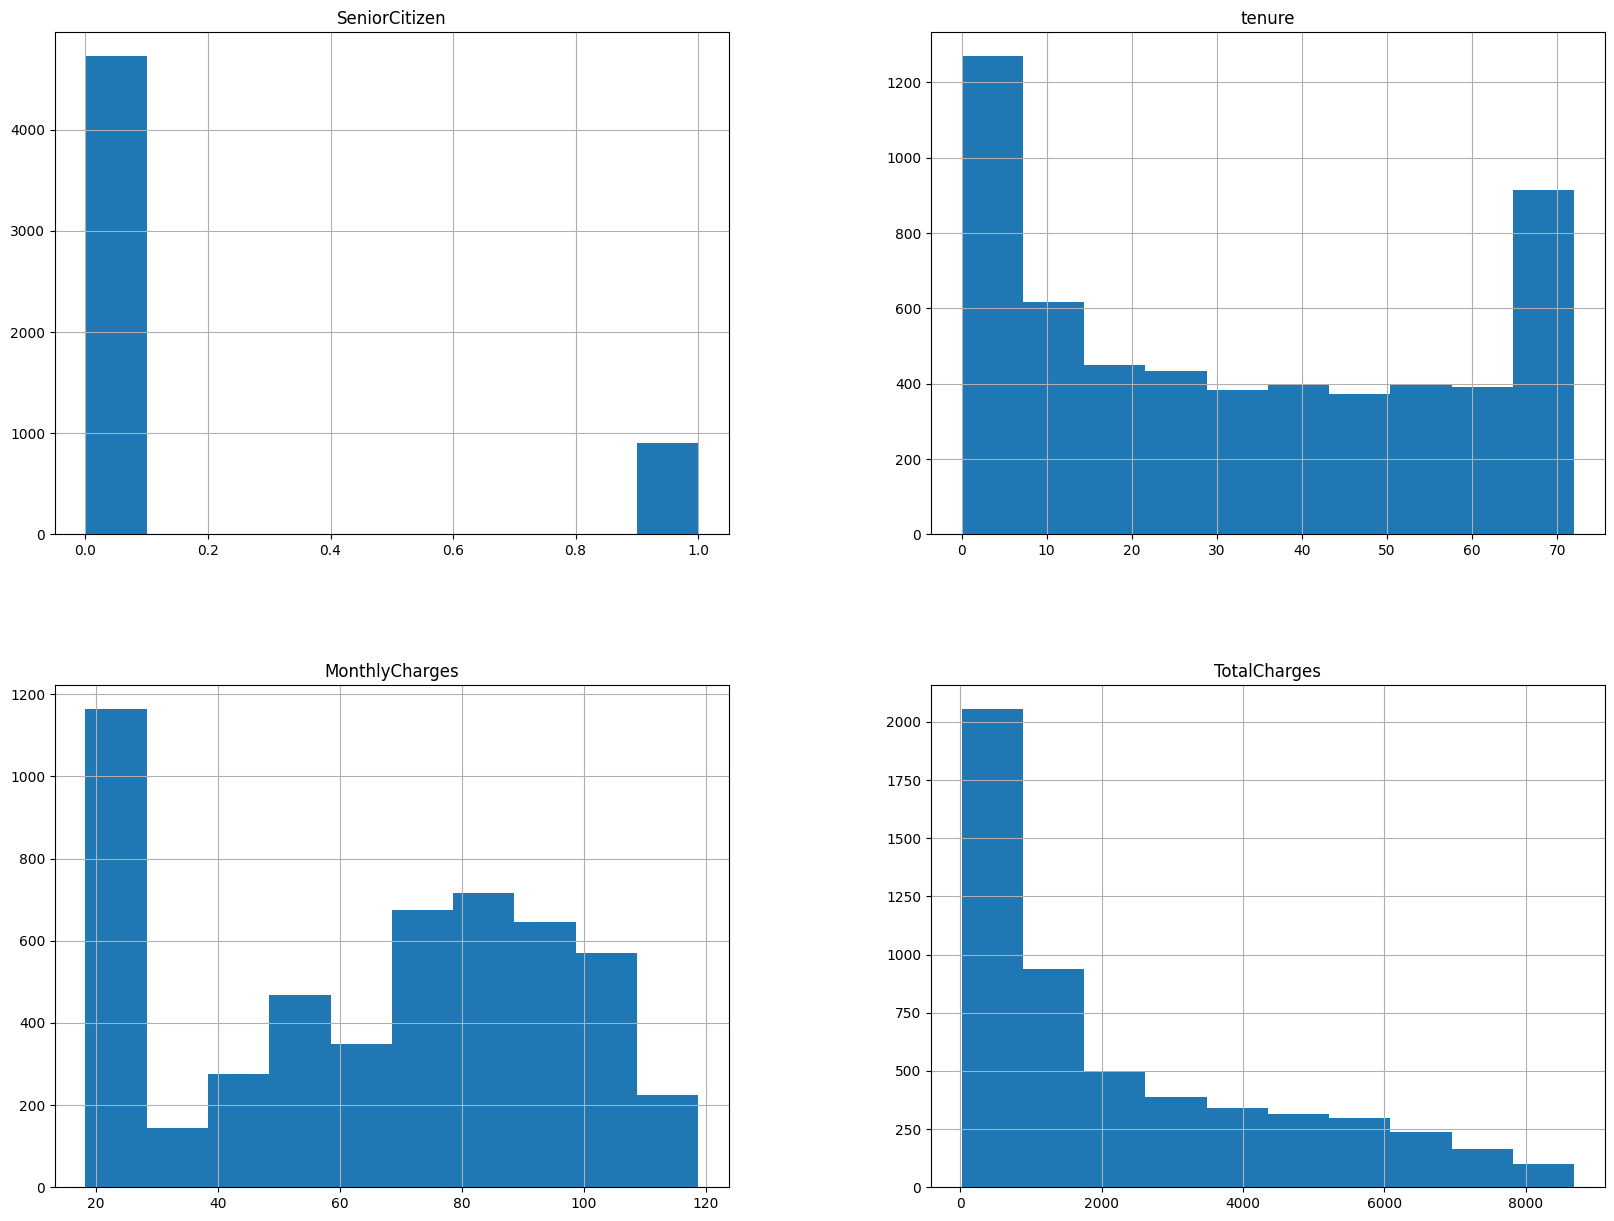

In [115]:
#histogram
freqgraph=churn_data.select_dtypes(include='number')
freqgraph.hist(figsize=(20,15))

In [116]:
churn_data['TotalCharges']=churn_data['TotalCharges'].fillna(churn_data['TotalCharges'].median())
#filled with median

In [117]:
churn_data['MonthlyCharges']=churn_data['MonthlyCharges'].fillna(churn_data['MonthlyCharges'].median())
#filled with median

In [118]:
mode_online_security= churn_data['OnlineSecurity'].mode()[0]
mode_online_security
churn_data['OnlineSecurity'].fillna(mode_online_security,inplace=True)
#filled with mode

/tmp/ipython-input-3265608635.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_data['OnlineSecurity'].fillna(mode_online_security,inplace=True)


In [119]:
churn_data['Churn'] = churn_data['Churn'].map({'Yes': 1, 'No': 0})
#converting target column from yes/no to 0/1

In [120]:
churn_data.isnull().sum()
#null values handled

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Tenure Distribution


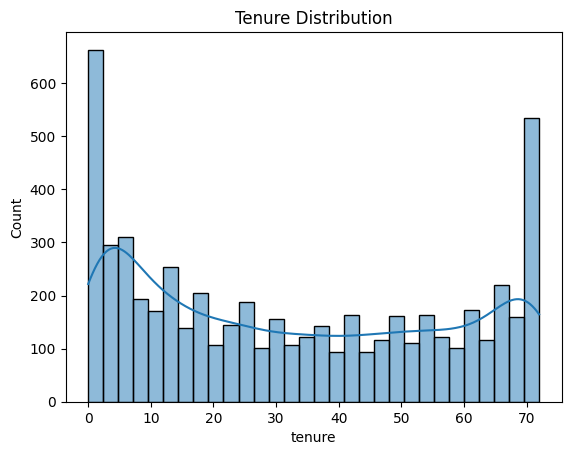

In [121]:
sns.histplot(churn_data['tenure'], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.show()


large number of customers have low tenure(new customers)
low tenure customers churn more
high tenure customer stays


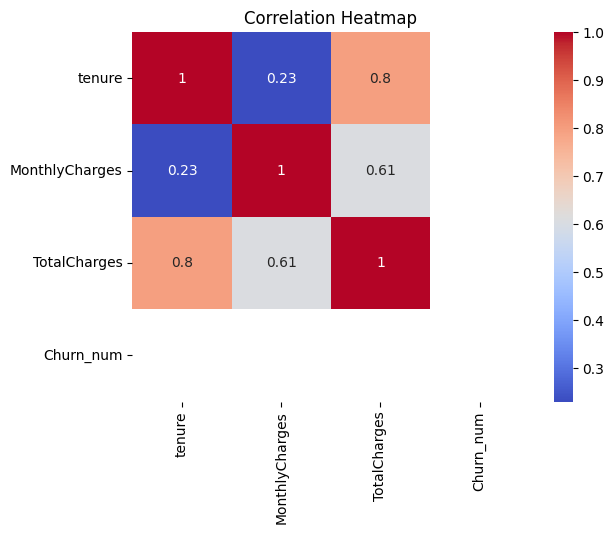

In [122]:
churn_data['Churn_num'] = churn_data['Churn'].map({'Yes':1, 'No':0})

corr = churn_data[['tenure','MonthlyCharges','TotalCharges','Churn_num']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

strong positive correlation between tenure and TotalCharges

##Checking For Outliers

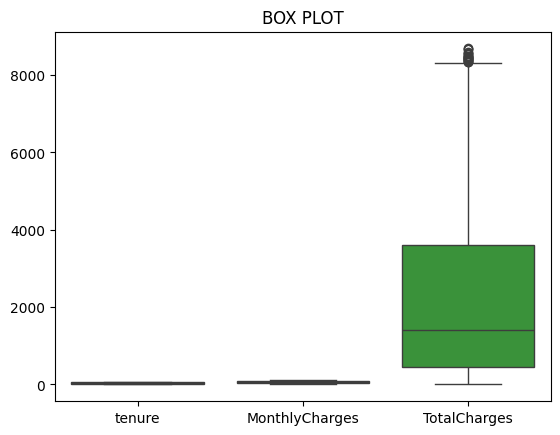

In [123]:
sns.boxplot(data=churn_data[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.title("BOX PLOT")
plt.show()
#TotalCharges column shows outliers

###Handling Outliers

IQR Method

In [124]:
q1=np.percentile(churn_data['TotalCharges'],25)
q3=np.percentile(churn_data['TotalCharges'],75)
iqr=q3-q1
print(q1,q3,iqr)


450.5 3601.0375 3150.5375


In [125]:
up_val=q3+(1.5*iqr)
low_val=q1-(1.5*iqr)
print(up_val,low_val)

8326.84375 -4275.30625


In [126]:
for x in churn_data['TotalCharges']:
  if x > up_val or x <low_val:
    print(x)

8349.45
8496.7
8476.5
8332.15
8404.9
8425.15
8670.1
8684.8
8468.2
8333.95
8594.4
8399.15
8456.75
8436.25
8477.6
8425.3
8543.25
8672.45
8564.75
8349.7
8529.5
8424.9


In [127]:
churn_data["TotalCharges"]=churn_data['TotalCharges'].clip(lower=low_val,upper=up_val)

<Axes: >

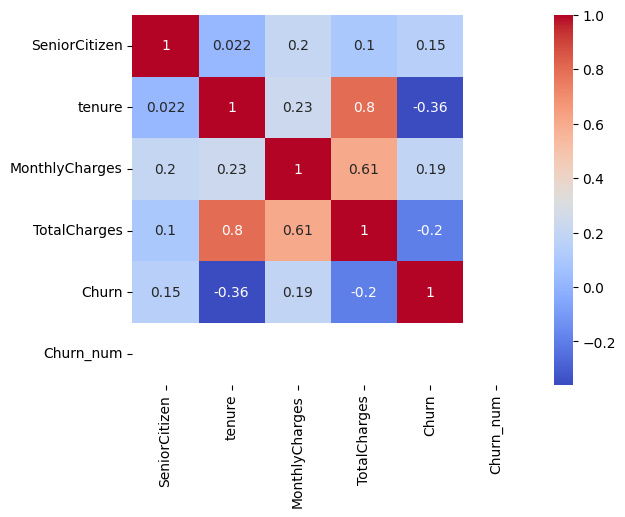

In [128]:
trn1=churn_data.select_dtypes(include=['number'])
corr=trn1.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

#Feature Engineering

In [129]:
#captures customer lifetime value (e.g., Tenure * MonthlyCharges)?
churn_data['CLV'] =churn_data['tenure'] * churn_data['MonthlyCharges']

In [130]:
#create interaction features (e.g., combining Tenure and Contract)?
# Month-to-month: 1, One year: 12, Two year: 24
churn_data['Contract_Months'] = churn_data['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

# Interaction Feature
churn_data['Tenure_Contract_Interaction'] = churn_data['tenure'] * churn_data['Contract_Months']

#Encoding

In [131]:
churn_data.dtypes.value_counts()

,count
object,15
int64,5
float64,4


In [132]:
churn_data.nunique()

,0
gender,3
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,2
InternetService,3
OnlineSecurity,2
OnlineBackup,2


In [133]:
onehot_col=['gender','PaymentMethod','Contract','StreamingMovies','StreamingTV','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity','InternetService','MultipleLines']
le_cols=['Partner','Dependents','PhoneService','PaperlessBilling']

In [134]:
churn_data= pd.get_dummies(churn_data, columns= onehot_col, drop_first=True,dtype=int)
#one-hot encoding

In [135]:

le= LabelEncoder()
# houseprice['Waterfront View']=le.fit_transform(houseprice['Waterfront View'])
# houseprice
for col in le_cols:
  if col in churn_data.columns:
    churn_data[col]=le.fit_transform(churn_data[col])
churn_data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Churn_num,...,Contract_Two year,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes,DeviceProtection_Yes,OnlineBackup_Yes,OnlineSecurity_Yes,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes
0,0,0,0,35,1,0,20.75,700.45,0,NaN,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,28,0,1,35.75,961.40,0,NaN,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,56,1,0,98.60,5581.05,0,NaN,...,0,1,1,0,0,1,0,1,0,1
3,0,1,0,39,1,1,20.45,790.00,0,NaN,...,1,0,0,0,0,0,0,0,1,0
4,0,1,1,43,0,1,51.25,2151.60,0,NaN,...,0,0,1,1,0,1,0,0,0,0


In [136]:
churn_data.shape

(5626, 29)

##Feature Selection

In [137]:
#If a feature has the same value for 99% of your customers it provides no predictive power. This removes features that have the same value in more than 99% of samples
selector = VarianceThreshold(threshold=0.01)
selector.fit(churn_data)

# Get the remaining columns
selected_cols = churn_data.columns[selector.get_support()]
churn_data = churn_data[selected_cols]

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


### Check for Multi-Collinearity (Correlation)

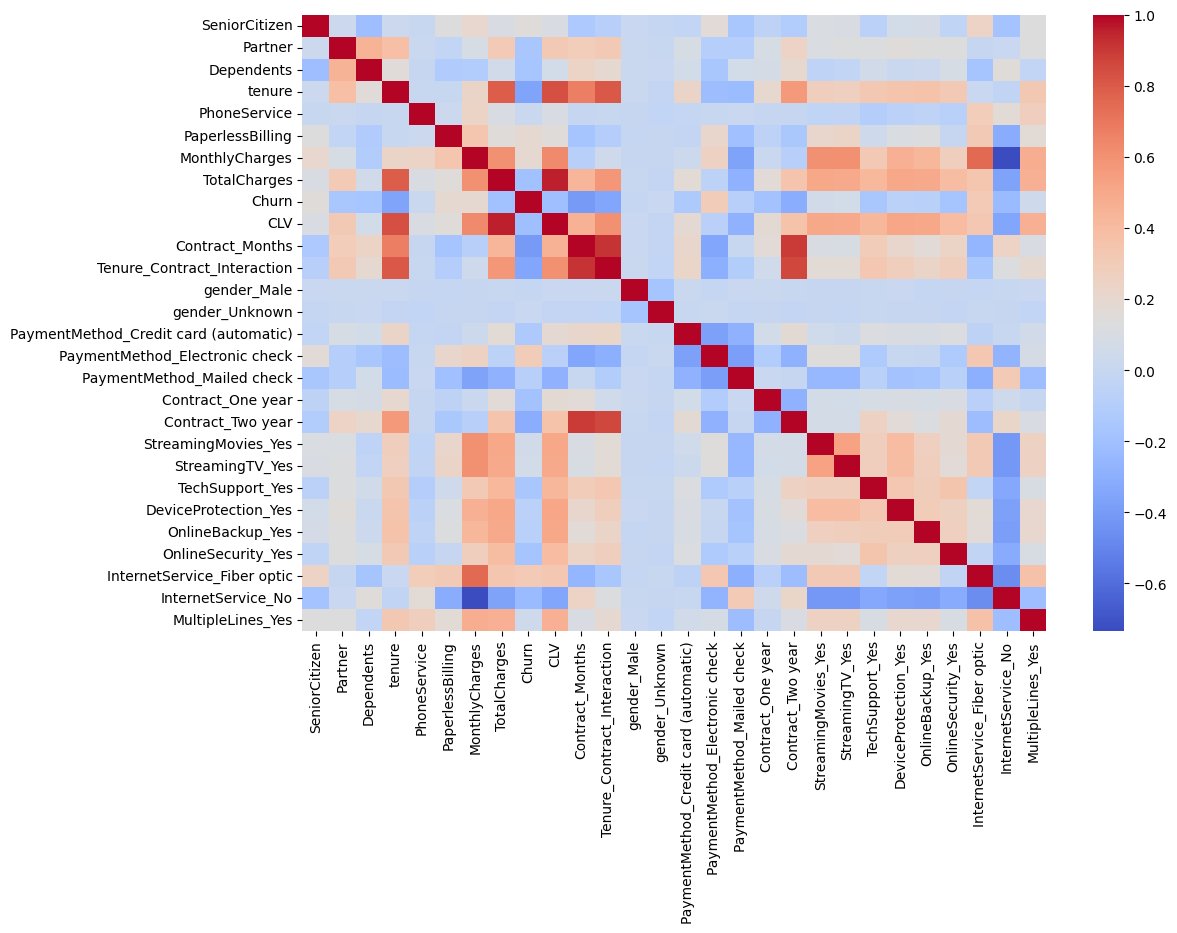

In [138]:
plt.figure(figsize=(12, 8))
correlation_matrix = churn_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [139]:
print(correlation_matrix['tenure'].sort_values(ascending=False))

tenure                                   1.000000
CLV                                      0.833046
Tenure_Contract_Interaction              0.805948
TotalCharges                             0.796861
Contract_Months                          0.673348
Contract_Two year                        0.563372
Partner                                  0.379335
OnlineBackup_Yes                         0.358952
DeviceProtection_Yes                     0.356812
MultipleLines_Yes                        0.328240
TechSupport_Yes                          0.326823
OnlineSecurity_Yes                       0.321250
StreamingMovies_Yes                      0.282249
StreamingTV_Yes                          0.275011
PaymentMethod_Credit card (automatic)    0.234394
MonthlyCharges                           0.230711
Contract_One year                        0.198906
Dependents                               0.154762
SeniorCitizen                            0.021905
gender_Male                              0.014649


In [140]:
service_cols = [
    'MultipleLines_Yes','OnlineSecurity_Yes','OnlineBackup_Yes',
    'DeviceProtection_Yes','TechSupport_Yes',
    'StreamingTV_Yes','StreamingMovies_Yes'
]

churn_data['TotalServices'] = churn_data[service_cols].sum(axis=1)
numerical=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges','TotalServices']

In [141]:
corr = churn_data.corr()['Churn'].sort_values(ascending=False)
corr

,Churn
Churn,1.000000
InternetService_Fiber optic,0.310229
PaymentMethod_Electronic check,0.299730
MonthlyCharges,0.189943
PaperlessBilling,0.189368
SeniorCitizen,0.148286
StreamingTV_Yes,0.061275
StreamingMovies_Yes,0.058580
MultipleLines_Yes,0.041397
PhoneService,0.013967


In [142]:
# Create the correlation matrix
corr_matrix = churn_data.corr().abs()

# Select the upper triangle (to avoid duplicate pairs like A-B and B-A)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.85
high_corr = [(column, row, upper[column][row])
             for column in upper.columns
             for row in upper.index
             if upper[column][row] > 0.85]

print("Highly Correlated Pairs (> 0.85):")
for pair in high_corr:
    print(f"{pair[0]} & {pair[1]}: {pair[2]:.2f}")

Highly Correlated Pairs (> 0.85):
CLV & TotalCharges: 0.96
Tenure_Contract_Interaction & Contract_Months: 0.91
Contract_Two year & Contract_Months: 0.89
Contract_Two year & Tenure_Contract_Interaction: 0.86


In [143]:
# List of columns to drop based on your high correlation results
to_drop = ['TotalCharges', 'Contract_Months', 'Contract_Two year']

# Update your dataframe
churn_data_final = churn_data.drop(columns=to_drop)

print(f"Features remaining: {len(churn_data_final.columns)}")
print(churn_data_final.columns)

Features remaining: 26
Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'Churn', 'CLV',
       'Tenure_Contract_Interaction', 'gender_Male', 'gender_Unknown',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'StreamingMovies_Yes', 'StreamingTV_Yes',
       'TechSupport_Yes', 'DeviceProtection_Yes', 'OnlineBackup_Yes',
       'OnlineSecurity_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TotalServices'],
      dtype='object')


#Scaling

In [144]:
sscaler = StandardScaler()
churn_data[numerical] = sscaler.fit_transform(churn_data[numerical])

In [145]:
churn_data_final.shape

(5626, 26)

#Model Development

In [146]:
X = churn_data_final.drop('Churn', axis=1)  # X - features
y = churn_data_final['Churn']  # Y - target

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [148]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4500, 25)
(1126, 25)
(4500,)
(1126,)


In [149]:
y_train.head()

,Churn
2728,1
2024,0
4418,0
533,0
4622,0


###Logistic Regression

In [150]:
#initializing the ML model
log_reg_model=LogisticRegression(max_iter=1000)
#training model
log_reg_model.fit(X_train,y_train)
#predict using the model and test features
y_pred_log_reg=log_reg_model.predict(X_test)
#Evaluating ML Model
Acc_log_reg=accuracy_score(y_test,y_pred_log_reg)
prec_log_reg=precision_score(y_test,y_pred_log_reg)
Rec_log_reg=recall_score(y_test,y_pred_log_reg)
f1_log_reg=f1_score(y_test,y_pred_log_reg)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [151]:
print("Accuracy Score : ",Acc_log_reg)
print("Precision Score : ",prec_log_reg)
print("Recall Score : ",Rec_log_reg)
print("f1 Score : ",f1_log_reg)

Accuracy Score :  0.8028419182948491
Precision Score :  0.6792452830188679
Recall Score :  0.5678233438485805
f1 Score :  0.6185567010309279


###Decision Tree


In [152]:
d_model=DecisionTreeClassifier()
d_model.fit(X_train,y_train)
#predict using trained Ml model
y_pred_dtree=d_model.predict(X_test)

In [153]:
#evaluate ml model
Acc_dtree=accuracy_score(y_test,y_pred_dtree)
prec_dtree=precision_score(y_test,y_pred_dtree)
rec_dtree=recall_score(y_test,y_pred_dtree)
f1_dtree=f1_score(y_test,y_pred_dtree)

In [154]:
print("Accuracy:",Acc_dtree)
print("Precision: ",prec_dtree)
print("Recall:",rec_dtree)
print("f1 score:",f1_dtree)

Accuracy: 0.7433392539964476
Precision:  0.5466666666666666
Recall: 0.5173501577287066
f1 score: 0.5316045380875203


###Naive Bayes

In [155]:
#initializing the model
nb_model=GaussianNB()
#training model
nb_model.fit(X_train,y_train)
#predict using trained Ml model
y_pred_nb=nb_model.predict(X_test)

In [156]:
#evaluate ml model
Acc_nb=accuracy_score(y_test,y_pred_nb)
prec_nb=precision_score(y_test,y_pred_nb)
rec_nb=recall_score(y_test,y_pred_nb)
f1_nb=f1_score(y_test,y_pred_nb)

In [157]:
print("Accuracy:",Acc_nb)
print("Precision: ",prec_nb)
print("Recall:",rec_nb)
print("f1 score:",f1_nb)

Accuracy: 0.7522202486678508
Precision:  0.5411255411255411
Recall: 0.7886435331230284
f1 score: 0.6418485237483954


###KNN

In [158]:
accuracy_list = []
neighbors_range = np.arange(1,20)

for k in neighbors_range:
  classifier = KNeighborsClassifier(n_neighbors=k , metric='minkowski',p=2)  # initialising classifier for iteration using Euclidian p=2
  #Training the ML model
  classifier.fit(X_train, y_train)
  y_pred_knn=classifier.predict(X_test)  #predict using trained ML model
  acc = accuracy_score(y_test,y_pred_knn)  # evaluate the ML model
  accuracy_list.append(acc)

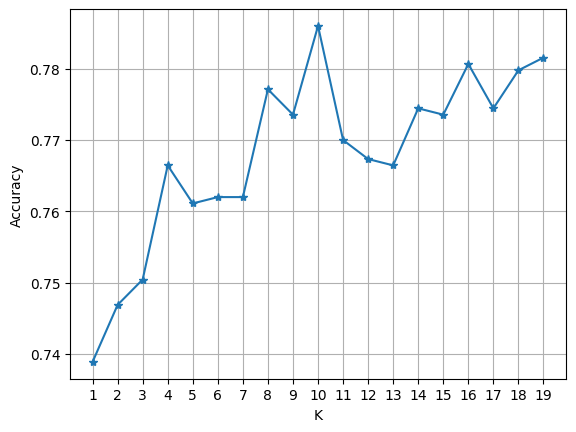

In [159]:
plt.plot(neighbors_range, accuracy_list,'*-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.grid()

In [160]:
classifier_knn = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
classifier_knn.fit(X_train,y_train)
y_pred_knn_eu = classifier_knn.predict(X_test)
acc_knn=accuracy_score(y_test,y_pred_knn_eu)
prec_knn=precision_score(y_test,y_pred_knn_eu)
rec_knn=recall_score(y_test,y_pred_knn_eu)
f1_knn=f1_score(y_test,y_pred_knn_eu)


In [161]:
print('Accuracy:',acc_knn)
print('Precision:',prec_knn)
print('Recall:',rec_knn)
print('F1 Score:',f1_knn)

Accuracy: 0.7673179396092362
Precision: 0.6381909547738693
Recall: 0.40063091482649843
F1 Score: 0.49224806201550386


###SVM

In [162]:
# # create SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True)
# # train model
svm_model.fit(X_train, y_train)
#  predict using trained ML model
y_pred_svm = svm_model.predict(X_test)

In [163]:
# Updated model with balanced weights


In [164]:
Acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

In [165]:
print("Accuracy:", Acc_svm)
print("Precision:", prec_svm)
print("Recall:", rec_svm)
print("F1 score:", f1_svm)

Accuracy: 0.6563055062166963
Precision: 0.4444444444444444
Recall: 0.8832807570977917
F1 score: 0.5913410770855333


##Model comparison

In [166]:
results = pd.DataFrame({
    'Model': ['Decision Tree','Logistic Regression','Naive Bayes','SVM','KNN'],
    'Accuracy': [Acc_dtree,Acc_log_reg,Acc_nb,Acc_svm,acc_knn],
    'Precision': [prec_dtree,prec_log_reg,prec_nb,prec_svm,prec_knn],
    'Recall': [rec_dtree,Rec_log_reg,rec_nb,rec_svm,rec_knn],
    'F1 Score': [f1_dtree,f1_log_reg,f1_nb,f1_svm,f1_knn]
})

results


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.743339,0.546667,0.517350,0.531605
1,Logistic Regression,0.802842,0.679245,0.567823,0.618557
2,Naive Bayes,0.752220,0.541126,0.788644,0.641849
3,SVM,0.656306,0.444444,0.883281,0.591341
4,KNN,0.767318,0.638191,0.400631,0.492248


# **comparison Summary**
***Highest accuracy***- Logistic Regression

***Highest precision***:Logistic Regression

***Highest recall***: SVM

***best F1 score***: Naive Bayes

***Most balanced***: Naive Bayes/Logistic Regression

Choosing Logistic Regression

#Load  Testing data

In [167]:
filePath='/content/Testing_data.csv'
churn_test=pd.read_csv(filePath)

In [168]:
churn_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [169]:
churn_test.shape #same shape as train data

(1409, 21)

In [170]:
churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [171]:
churn_test=churn_test.drop('customerID',axis=1)

handling duplicates

In [172]:
churn_test.duplicated().sum()

np.int64(2)

In [173]:
churn_test=churn_test.drop_duplicates()

Checking missing values

In [174]:
churn_test.isnull().sum()
#no null values found

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [175]:
churn_test['TotalCharges'] = pd.to_numeric(churn_test['TotalCharges'], errors='coerce')

In [176]:
churn_test.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [177]:
#fillling gender null values with 'Unknown' variable
churn_test['gender']=churn_test['gender'].fillna('Unknown')
#droping 169 rows for irrelevent feature gender would affect important customer's details

In [178]:
churn_test['MultipleLines']=churn_test['MultipleLines'].replace('No phone service','No')
internet_dependent_col = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]
for col in internet_dependent_col:
    churn_test[col] = churn_test[col].replace('No internet service', 'No')
churn_test['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,874
Yes,533


In [179]:
churn_test['Churn'] = churn_test['Churn'].map({'Yes': 1, 'No': 0})
#converting target column from yes/no to 0/1

Feature engineering

In [180]:
churn_test['CLV'] =churn_test['tenure'] * churn_test['MonthlyCharges']
# Create a numeric mapping for Contract if not already done
# Month-to-month: 1, One year: 12, Two year: 24
churn_test['Contract_Months'] = churn_test['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

# Interaction Feature
churn_test['Tenure_Contract_Interaction'] = churn_test['tenure'] * churn_test['Contract_Months']

In [181]:
churn_test['CLV'] =churn_test['tenure'] * churn_test['MonthlyCharges']

In [182]:
churn_test.dtypes.value_counts()

,count
object,15
int64,5
float64,3


In [183]:
onehot_col_test=['gender','PaymentMethod','Contract','StreamingMovies','StreamingTV','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity','InternetService','MultipleLines']
le_cols_test=['Partner','Dependents','PhoneService','PaperlessBilling']

In [184]:
churn_test= pd.get_dummies(churn_test, columns= onehot_col_test, drop_first=True,dtype=int)
#one-hot encoding

In [185]:
le= LabelEncoder()
# houseprice['Waterfront View']=le.fit_transform(houseprice['Waterfront View'])
# houseprice
for col in le_cols_test:
  if col in churn_test.columns:
    churn_test[col]=le.fit_transform(churn_test[col])
churn_test.head()
churn_test.shape

(1407, 27)

Feature selection

In [186]:
#If a feature has the same value for 99% of your customers it provides no predictive power.
# This removes features that have the same value in more than 99% of samples
selector = VarianceThreshold(threshold=0.01)
selector.fit(churn_test)

# Get the remaining columns
selected_cols = churn_test.columns[selector.get_support()]
churn_test = churn_test[selected_cols]

In [187]:
service_cols = [
    'MultipleLines_Yes','OnlineSecurity_Yes','OnlineBackup_Yes',
    'DeviceProtection_Yes','TechSupport_Yes',
    'StreamingTV_Yes','StreamingMovies_Yes'
]

churn_test['TotalServices'] = churn_test[service_cols].sum(axis=1)
numericals=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges','TotalServices']

scaling

In [188]:
sscaler = StandardScaler()

# Fit ONLY on training data
X_train = sscaler.fit_transform(X_train)

# ONLY transform test data
X_test = sscaler.transform(X_test)


In [189]:
corr = churn_data.corr()['Churn'].sort_values(ascending=False)


In [190]:
# Create the correlation matrix
corr_matrix = churn_test.corr().abs()

# Select the upper triangle (to avoid duplicate pairs like A-B and B-A)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.85
high_corr = [(column, row, upper[column][row])
             for column in upper.columns
             for row in upper.index
             if upper[column][row] > 0.85]

print("Highly Correlated Pairs (> 0.85):")
for pair in high_corr:
    print(f"{pair[0]} & {pair[1]}: {pair[2]:.2f}")

Highly Correlated Pairs (> 0.85):
CLV & TotalCharges: 1.00
Tenure_Contract_Interaction & Contract_Months: 0.90
Contract_Two year & Contract_Months: 0.89
Contract_Two year & Tenure_Contract_Interaction: 0.85


In [191]:
# List of columns to drop based on your high correlation results
to_drop = ['TotalCharges', 'Contract_Months', 'Contract_Two year']

# Update your dataframe
churn_test_final = churn_test.drop(columns=to_drop)

print(f"Features remaining: {len(churn_data_final.columns)}")
print(churn_test_final.columns)

Features remaining: 26
Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'Churn', 'CLV',
       'Tenure_Contract_Interaction', 'gender_Male',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'StreamingMovies_Yes', 'StreamingTV_Yes',
       'TechSupport_Yes', 'DeviceProtection_Yes', 'OnlineBackup_Yes',
       'OnlineSecurity_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TotalServices'],
      dtype='object')


In [192]:
churn_test_final = churn_test_final.drop(columns='Churn')

In [193]:
churn_test_final.shape

(1407, 24)

In [194]:
churn_test_final = churn_test_final.reindex(
    columns=churn_data_final.drop(columns='Churn').columns,
    fill_value=0
)

In [195]:
set(churn_data_final.drop(columns='Churn').columns) == set(churn_test_final.columns)

True

#Final Model

In [196]:
X_final = churn_data_final.drop(columns=['Churn'])
y_final = churn_data_final['Churn']

In [197]:
best_lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
best_lr.fit(X_final, y_final)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [198]:
X_train = churn_data_final.drop(columns='Churn')
y_train = churn_data_final['Churn']
X_test = churn_test_final
y_test = churn_test['Churn']

In [199]:
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Training model
log_reg_model.fit(X_train, y_train)

#  Predict using the model and test features
y_pred_log_reg = log_reg_model.predict(X_test)
# Evaluating ML Model
Acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
prec_log_reg = precision_score(y_test, y_pred_log_reg)
Rec_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [200]:
print("Accuracy:",Acc_log_reg)
print("Precision:",prec_log_reg)
print("Recall:  ", Rec_log_reg)
print("F1 Score: ",f1_log_reg)

Accuracy: 0.8123667377398721
Precision: 0.6644736842105263
Recall:   0.554945054945055
F1 Score:  0.6047904191616766


#Model Fine-Tuning

In [201]:
from sklearn.model_selection import GridSearchCV

# # 1. Define the parameter grid
param_grid = {
     'C': [0.001, 0.01, 0.1, 1, 10, 100], # Strength of regularization (smaller = stronger)
     'penalty': ['l1', 'l2'],            # Type of regularization
     'solver': ['liblinear']             # Required for l1 penalty
 }

# # 2. Initialize GridSearchCV
# # We use 'recall' as the scoring metric because catching churners is our priority
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='recall')

# # 3. Fit to your training data
grid_search.fit(X_train, y_train)

# # 4. Identify the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [202]:
# # Predict with the tuned model
y_pred_tuned = best_model.predict(X_test)

# # Calculate new metrics
tuned_recall = recall_score(y_test, y_pred_tuned)
tuned_acc = accuracy_score(y_test, y_pred_tuned)

print(f"Original Recall: {Rec_log_reg:.4f} vs Tuned Recall: {tuned_recall:.4f}")
print(f"Original Accuracy: {Acc_log_reg:.4f} vs Tuned Accuracy: {tuned_acc:.4f}")

Original Recall: 0.5549 vs Tuned Recall: 0.5549
Original Accuracy: 0.8124 vs Tuned Accuracy: 0.8138


Hyperparameter tuning resulted in a marginal improvement in accuracy while maintaining the same recall. This indicates that the tuned model achieved better overall classification performance without compromising its ability to identify churned customers. However, recall remains moderate, suggesting that further improvements are possible by optimizing decision thresholds or using alternative models.